# EDA on Vehicle Insurance Customer Data

## 1. Add the column names to both datasets:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DataFrame1 = pd.read_csv('customer_details.csv')
DataFrame2 = pd.read_csv('customer_policy_details.csv')

In [3]:
DataFrame1.columns=['customer_id', 'Gender', 'age', 'driving licence present', 'region code', 'previously insured', 'vehicle age', 'vehicle damage']
DataFrame2.columns=['customer_id', 'annual premium (Rs)', 'sales channel code', 'vintage', 'response']

In [4]:
DataFrame1

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [5]:
DataFrame2

,customer_id,annual premium (Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


## 2. Checking and Cleaning Data Quality:

In [6]:
## i. Null values
#  Generate a summary of count of all the null values column wise


df1_null = DataFrame1.isnull()
for i in df1_null.columns.values.tolist():
    print(i)
    print(df1_null[i].value_counts())
    print("")
    
## HERE TRUE VALUE SHOWS NULL VALUE IN COLUMNS

customer_id
False    380723
True        386
Name: customer_id, dtype: int64

Gender
False    380741
True        368
Name: Gender, dtype: int64

age
False    380741
True        368
Name: age, dtype: int64

driving licence present
False    380716
True        393
Name: driving licence present, dtype: int64

region code
False    380717
True        392
Name: region code, dtype: int64

previously insured
False    380728
True        381
Name: previously insured, dtype: int64

vehicle age
False    380728
True        381
Name: vehicle age, dtype: int64

vehicle damage
False    380702
True        407
Name: vehicle damage, dtype: int64



#### From above we can say that
customer_id has 386 null values 

Gender has 368 null values

age has 368 null values

driving licence present has 393 null values

region code has 392 null values

previously insured has 381 null values

vehicle age has 381 null values

vehicle damage has 407 null values

In [7]:
df2_null = DataFrame2.isnull()

for i in df2_null.columns.values.tolist():
    print(i)
    print(df2_null[i].value_counts())
    print("")
    
## HERE TRUE VALUE SHOWS NULL VALUE IN COLUMNS

customer_id
False    380722
True        387
Name: customer_id, dtype: int64

annual premium (Rs)
False    380763
True        346
Name: annual premium (Rs), dtype: int64

sales channel code
False    380709
True        400
Name: sales channel code, dtype: int64

vintage
False    380721
True        388
Name: vintage, dtype: int64

response
False    380748
True        361
Name: response, dtype: int64



#### From above we can say that
customer_id has 387 null values

annual premium has 346 null values

sales channel code has 400 null values

vintage has 388 null values

responce has 361 null values

In [8]:
#  Drop Null values for customer_id because central tendencies for id’s is not feasible.


# Dropping the rows that contains null values of customr_id on customer details table
DataFrame1.dropna(subset=['customer_id'], axis=0,inplace=True)

In [9]:
# resetting index because some rows deleted
DataFrame1.reset_index(drop = True, inplace = True)

In [10]:
# Dropping the rows that contains null values of customr_id on customer policy details table
DataFrame2.dropna(subset=['customer_id'], axis=0,inplace=True)

In [11]:
# resetting index because some rows deleted
DataFrame2.reset_index(drop = True, inplace = True)

In [12]:
DataFrame1.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [13]:
DataFrame2.head()

,customer_id,annual premium (Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [14]:
#  Replace all null values for numeric columns by mean. 

DataFrame1['age'].fillna(DataFrame1['age'].mean(),inplace = True)

In [15]:
# Replacing the null values of region code by its mean value

DataFrame1['region code'].fillna(DataFrame1['region code'].mean(),inplace = True)

In [16]:
DataFrame1.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [17]:
# Replacing the NaN values of annual premium by its mean value
DataFrame2['annual premium (Rs)'].fillna(DataFrame2['annual premium (Rs)'].mean(),inplace = True)

# Replacing the NaN values of sales channel code by its mean value
DataFrame2['sales channel code'].fillna(DataFrame2['sales channel code'].mean(),inplace = True)

# Replacing the NaN values of vintage by its mean value
DataFrame2['vintage'].fillna(DataFrame2['vintage'].mean(),inplace = True)

In [18]:
DataFrame2.head()

,customer_id,annual premium (Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [19]:
#  Replace all null values for Categorical value by mode.

DataFrame1['driving licence present'].fillna (DataFrame1['driving licence present'].mode()[0], inplace=True)

DataFrame1['previously insured'].fillna (DataFrame1['previously insured'].mode()[0], inplace=True)

In [20]:
# it replaces the null values with the value which exist maximum no of times i.e. mode

DataFrame2['response'].fillna(DataFrame2['response'].mode()[0], inplace=True)

In [21]:
DataFrame1.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [22]:
DataFrame2.head()

,customer_id,annual premium (Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [23]:
#  ii. Outliers
##  Generate a summary of count of all the outliers column wise

## this functions finds outliers if present by IQR method..

def finding_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outlier = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outlier
 

outliers = finding_outliers(DataFrame1['age'])  # FINDING OUTLIERS FROM AGE COLUMN IN DATAFRAME1

print('Number of outliers :',len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


In [24]:
outliers = finding_outliers(DataFrame1['region code'])  # FINDING OUTLIERS FROM REGION CODE COLUMN IN DATAFRAME1

print('Number of outliers :',len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


#### There are no outliers in DataFrame1

===================================================================================

In [25]:
outliers = finding_outliers(DataFrame2['annual premium (Rs)'])  # FINDING OUTLIERS FROM ANNUAL PREMIUM COLUMN IN DATAFRAME2

print('Number of outliers :',len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers : 10332
Maximum outlier value : 540165.0
Minimum outlier value : 61858.0


In [26]:
outliers = finding_outliers(DataFrame2['sales channel code'])  # FINDING OUTLIERS FROM SALES CHANNEL CODE COLUMN IN DATAFRAME2

print('Number of outliers :',len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


In [27]:
outliers = finding_outliers(DataFrame2['vintage'])  # FINDING OUTLIERS FROM VINTAGE COLUMN IN DATAFRAME2

print('Number of outliers :',len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


#### Only  annual premium has outliers

===================================================================================

In [28]:
##  Replace all outlier values for numeric columns by mean.

def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df<(q1-1.5*iqr))].min()
    df = np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df
 

DataFrame2['annual premium (Rs)'] = replace_outlier(DataFrame2['annual premium (Rs)'])

In [29]:
DataFrame2.head()

,customer_id,annual premium (Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [30]:
##  iii. White spaces

DataFrame1.apply(lambda x: x.str.strip() if x.dtype=='object' else x)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [31]:
# The customer policy details tables contains all the columns of integer or float type only.so no need to remove spaces

In [32]:
##  iv. case correction(lower or upper, any one) 

DataFrame1.apply(lambda x: x.str.upper() if x.dtype=='object' else x)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO
...,...,...,...,...,...,...,...,...
380718,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO
380719,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO
380720,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO
380721,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES


In [33]:
##  v. Convert nominal data (categorical) into dummies 
#   for future modeling use if required

# Creating dummy variable for vehicle damage

dummy_var_1 = pd.get_dummies(DataFrame1["vehicle damage"]) 

dummy_var_1.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [34]:
# Changing the column names for dummy variable

dummy_var_1.rename(columns={'No':'vehicle-damage-No', 'Yes':'vehicle-damage-Yes'}, inplace=True)

dummy_var_1.head()

,vehicle-damage-No,vehicle-damage-Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [35]:
# merge data frame "df1" and "dummy_var_1" 
DataFrame1 = pd.concat([DataFrame1, dummy_var_1], axis=1)


# drop original column "vehicle damage" from "DataFrame1"
DataFrame1.drop("vehicle damage", axis = 1, inplace=True)

In [36]:
DataFrame1.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,0,1
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,1,0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,0,1
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,1,0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,1,0


In [37]:
# The customer policy details tables containls all the columns of integer or float type only.so no need to convert to nominal data

In [38]:
#   vi. Drop Duplicates (duplicated rows)

# Dropping duplicates from customer details table

DataFrame1.drop_duplicates(inplace=True)

In [39]:
# Dropping duplicates from customer policy details table

DataFrame2.drop_duplicates(inplace=True)

## 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

(Hint: use pd.merge() function)

In [40]:
master_data = pd.merge(DataFrame1,DataFrame2,on='customer_id')
master_data

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes,annual premium (Rs),sales channel code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,0,1,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,1,0,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,0,1,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,1,0,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,1,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,1,0,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,1,0,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,1,0,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,0,1,44617.0,124.0,74.0,0.0


## 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

In [41]:
##  i. Gender wise average annual premium

gender_data = master_data.groupby('Gender')['annual premium (Rs)'].mean()

gender_data

Gender
Female    29273.474247
Male      29323.022594
Name: annual premium (Rs), dtype: float64

<AxesSubplot:title={'center':'Gender vs average annual premium'}, xlabel='Gender', ylabel='annual premium(Rs)'>

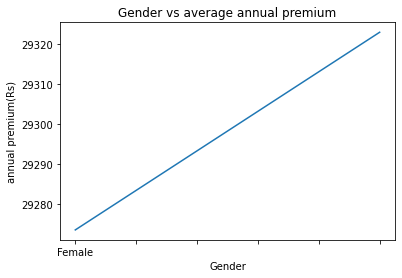

In [55]:
gender_data.plot(xlabel="Gender",ylabel="annual premium(Rs)",title="Gender vs average annual premium")

<AxesSubplot:title={'center':'Gender vs average annual premium'}, xlabel='Gender', ylabel='annual premium(Rs)'>

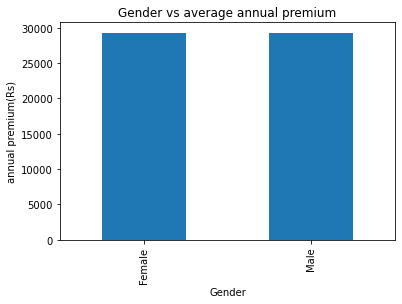

In [56]:
gender_data.plot.bar(xlabel="Gender",ylabel="annual premium(Rs)",title='Gender vs average annual premium')

In [44]:
##  ii. Age wise average annual premium

age_data = master_data.groupby('age')['annual premium (Rs)'].mean()

age_data

age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium (Rs), Length: 67, dtype: float64

<AxesSubplot:title={'center':'Age vs Average annual premium'}, xlabel='age', ylabel='annual premium(Rs)'>

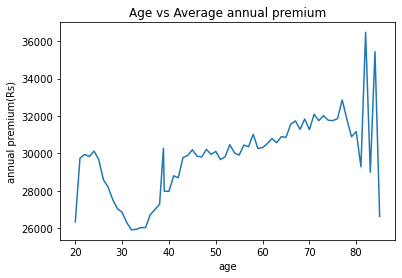

In [45]:
age_data.plot(xlabel="age",ylabel="annual premium(Rs)",title="Age vs Average annual premium")

<AxesSubplot:title={'center':'Age vs Average annual premium'}, xlabel='age', ylabel='annual premium(Rs)'>

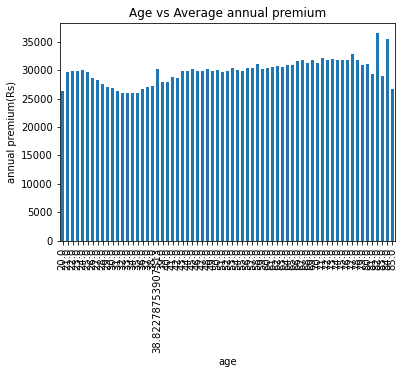

In [54]:
age_data.plot.bar(xlabel="age",ylabel="annual premium(Rs)",title="Age vs Average annual premium")

In [47]:
##  iii. Is your data balanced between the genders? 
## Hint: Data is balanced if number of counts in each group is approximately same

master_data.groupby('Gender').count()

,customer_id,age,driving licence present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes,annual premium (Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,,
Female,174485,174485,174485,174485,174485,174309,174485,174485,174485,174485,174485,174485
Male,205484,205484,205484,205484,205484,205279,205484,205484,205484,205484,205484,205484


In [48]:
205484/174485

1.1776599707711264

In [ ]:
## Here we can say that data is balance 

In [50]:
##  iv. Vehicle age wise average annual premium.

vehicle_age = master_data.groupby('vehicle age')['annual premium (Rs)'].mean()

vehicle_age

vehicle age
1-2 Year     29099.066738
< 1 Year     29188.150594
> 2 Years    32943.540830
Name: annual premium (Rs), dtype: float64

<AxesSubplot:title={'center':'vehicle age vs Average annual premium'}, xlabel='vehicle age', ylabel='annual premium(Rs)'>

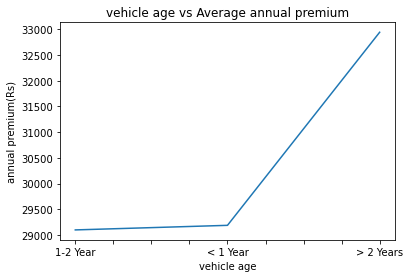

In [57]:
vehicle_age.plot(xlabel="vehicle age",ylabel="annual premium(Rs)",title="vehicle age vs Average annual premium") 

<AxesSubplot:title={'center':'vehicle age vs Average annual premium'}, xlabel='vehicle age', ylabel='annual premium(Rs)'>

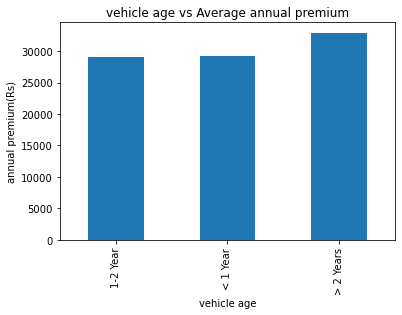

In [58]:
vehicle_age.plot.bar(xlabel="vehicle age",ylabel="annual premium(Rs)",title="vehicle age vs Average annual premium")

## 5. Is there any relation between Person Age and annual premium?

Hint: use correlation function (Correlation describes the relationship between two variables). 

Correlation coefficient < -0.5           - Strong negative relationship

Correlation coefficient > 0.5            -  Strong positive relationship

0.5 < Correlation coefficient < 0.5   - There is no relationship. 

In [53]:
master_data['age'].corr(master_data['annual premium (Rs)'])

0.05065758928617528

#### From above result we can clearly say that there are no relation between Person Age and annual premium